### Libraries

In [0]:
import os
import numpy as np
import pandas as pd
import quandl as qd
from datetime import datetime
from matplotlib import style
from matplotlib import pyplot as plt
from IPython import display

os.chdir('drive/ml_directory/trading/part_1/')

pd.options.display.float_format = "{:.2f}".format
style.use('ggplot')

In [0]:
with open('../auth.txt') as api_access:
    key = api_access.read()

### Data Loader Function

In [0]:
Date = pd.date_range(datetime(2014, 1, 1), datetime.now())
def load_stock_data(symbols, value):
    dataframe = pd.DataFrame(index=Date)
    for sym in symbols:
        df_tmp = qd.get('NSE/'+str(sym), authtoken=key)
        dataframe[sym] = df_tmp[value]
    dataframe = dataframe.dropna()
    return dataframe

In [6]:
symbols = ['TATASTEEL', 'INFRATEL']
df = load_stock_data(symbols=symbols, value='Close')
display.display(df.tail(10))
print('\nLength of dataframe : {}'.format(len(df)))

,TATASTEEL,INFRATEL
2018-04-20,606.20,331.10
2018-04-23,606.60,328.00
2018-04-24,597.55,329.00
2018-04-25,586.20,325.45
2018-04-26,578.20,316.10
2018-04-27,589.80,320.25
2018-04-30,594.95,313.10
2018-05-02,574.50,313.80
2018-05-03,585.45,324.95
2018-05-04,580.75,322.45



Length of dataframe : 1071


### Normalized Comparison

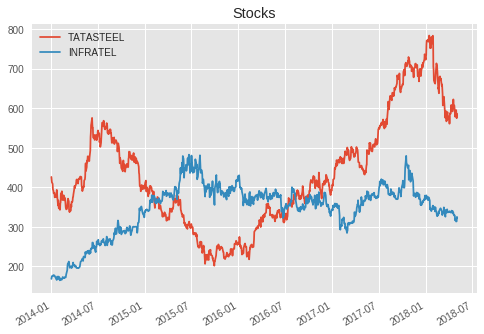

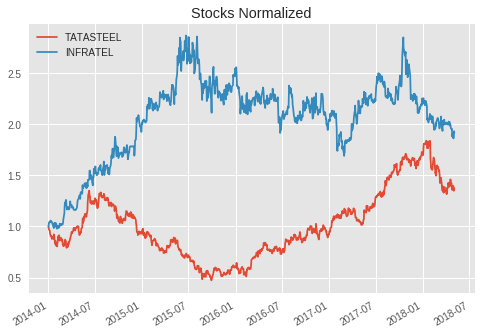

In [7]:
df.plot(title='Stocks')
plt.show()

print()

df_norm = df / df.iloc[0, :]
df_norm.plot()
plt.title('Stocks Normalized')
plt.show()

### Rolling and Bollinger Bands

In [0]:
def plot_roll_bands(sym, win):
    
    pb_df = pd.DataFrame(index=Date)
    pb_df[sym] = df[sym]
    pb_df = pb_df.dropna()
    
    plt.figure(figsize=(18, 9))
    ax = pb_df[sym].plot(title=sym+' Analysis',
                         label=sym,
                         color='k')

    rm = pb_df[sym].rolling(window=win).mean()
    rm.plot(label='Rolling Mean',
            color='b',
            ax=ax)

    rstd = pb_df[sym].rolling(window=win).std()
    up_band = rm + 2*rstd
    lw_band = rm - 2*rstd

    up_band.plot(label='Upper Band',
                 color='g',
                 ax=ax)
    lw_band.plot(label='Lower Band',
                 color='r',
                 ax=ax)
    plt.legend()
    ax.set_xlabel('Dates')
    ax.set_ylabel('Prices')
    plt.show()

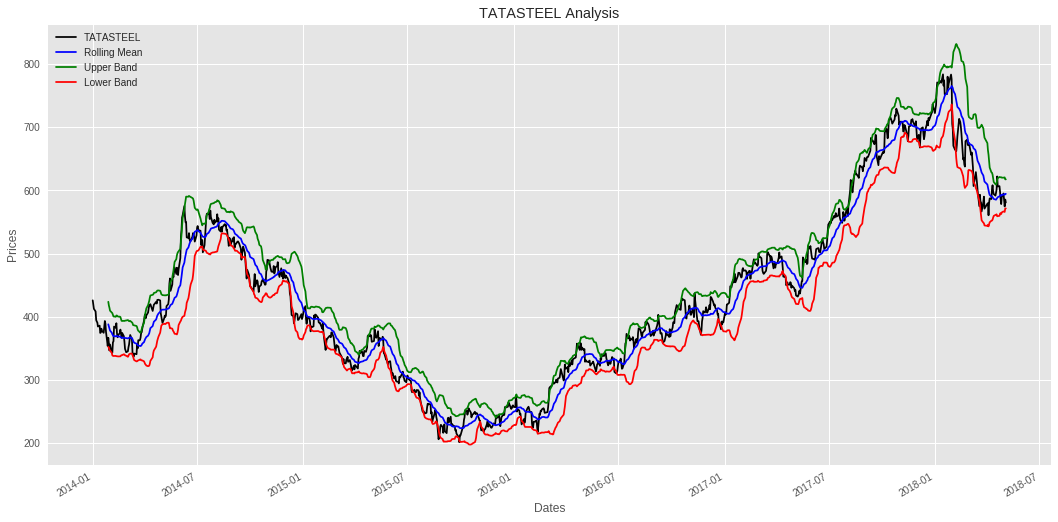

In [9]:
plot_roll_bands('TATASTEEL', 20)

### Daily Returns

In [0]:
def daily_return(df):
    df = (df / df.shift(1)) - 1
    df.iloc[0, :] = 0
    return df

,TATASTEEL
2014-01-01,0.00
2014-01-02,-0.02
2014-01-03,-0.02
2014-01-06,-0.01
2014-01-07,-0.03


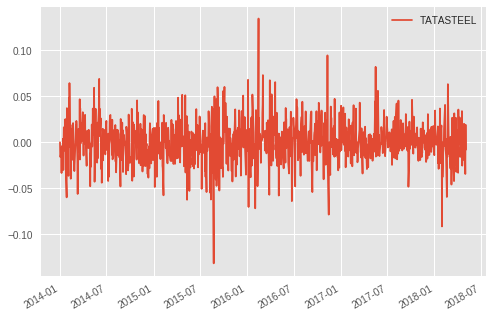

In [11]:
display.display(daily_return(df.loc[:, ['TATASTEEL']]).head())
daily_return(df.loc[:, ['TATASTEEL']]).plot()
plt.show()

Mean 0.0005444682142939942
Std 0.022586551274332053
Kurtosis 3.002407852250896


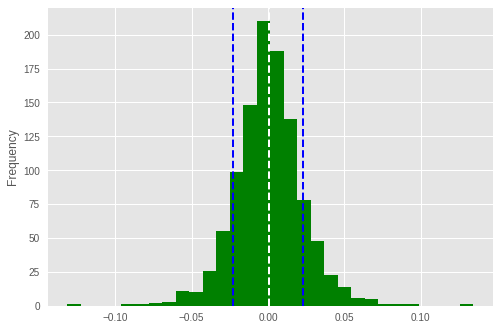

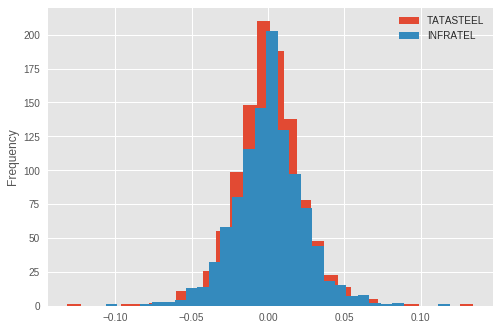

In [12]:
hist_df = daily_return(load_stock_data(symbols=['TATASTEEL', 'INFRATEL'], value='Close'))
hist_mean = hist_df['TATASTEEL'].mean()
hist_std = hist_df['TATASTEEL'].std()
hist_df['TATASTEEL'].plot.hist(bins=30, color='g')
print('Mean', hist_mean)
print('Std', hist_std)
print('Kurtosis', hist_df['TATASTEEL'].kurtosis())
plt.axvline(hist_mean,color='w',linestyle='--',linewidth=2)
plt.axvline(hist_std,color='b',linestyle='--',linewidth=2)
plt.axvline(-hist_std,color='b',linestyle='--',linewidth=2)
plt.show()

hist_df['TATASTEEL'].plot.hist(bins=30)
hist_df['INFRATEL'].plot.hist(bins=30)
plt.legend()
plt.show()